In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Lo primero que hacemos es leer todos los datos y guardarlos como Netflix_data para poder usarlos a nuestro gusto, y lo mostramos con el head.

In [4]:
netflix_data = pd.read_csv("Netflix.csv", sep=",")
netflix_data.head()


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


Revisamos como estan los datos, sus tipos y cantidad.

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


Reviso cuantos datos unicos hay de cada dato para saber donde normalizar y establecer valores de agrupacion.


In [9]:
Dir = netflix_data["director"].value_counts()
print("Total Directores:{}".format(Dir))
Rat = netflix_data["rating"].value_counts()
print("Total Rating:{}".format(Rat))
Con = netflix_data["country"].value_counts()
print("Total Country:{}".format(Con))
durN = netflix_data["duration_numeric"].value_counts()
print("Total Duration:{}".format(durN))
Gen = netflix_data["listed_in"].value_counts()
print("Total Genre:{}".format(Gen))
typ = netflix_data["type"].value_counts()
print("Total Type:{}".format(typ))

Total Directores:director
Generic                   1901
Raúl Campos, Jan Suter      18
Marcus Raboy                14
Jay Karas                   13
Jay Chapman                 12
                          ... 
Lenin Bharathi               1
James Foley                  1
Kunihiko Yuyama              1
Ranjit Jeyakodi              1
Sorin Dan Mihalcescu         1
Name: count, Length: 3109, dtype: int64
Total Rating:rating
TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
Unknown       10
UR             7
NC-17          2
Name: count, dtype: int64
Total Country:country
United States                                           1907
India                                                    697
Unknown                                                  427
United Kingdom                                           336
Japan                     

Para la duracion en la tabla prefiero normalizarla y establecer la cantidad de minutos para las peliculas y la cantidad de temporadas para las series. Y como estan diferenciadas por el tipo entonces no generara problemas.


In [6]:
netflix_data['duration_numeric'] = netflix_data.apply(
    lambda x: int(x['duration'].replace(' min', '')) if x['type'] == 'Movie' else int(x['duration'].replace(' Seasons', '').replace(' Season', '')), axis=1
)
netflix_data = netflix_data.drop('duration', axis=1)

Para que haya la misma cantidad de datos en toda la tabla y no se vean variables vacias por la tabla puse datos genericos o desconocidos para los valores que no hay ninguno. Asi se pueden manejar los datos de mejor manera y sabemos que tantos estan con valores genericos.

In [7]:
netflix_data['director'] = netflix_data['director'].fillna('Generic')
netflix_data['cast'] = netflix_data['cast'].fillna('Generic')
netflix_data['country'] = netflix_data['country'].fillna('Unknown')
netflix_data['date_added'] = netflix_data['date_added'].fillna(netflix_data['release_year'])
netflix_data['rating'] = netflix_data['rating'].fillna('Unknown')

Revisamos como queda la data despues de los cambios.

In [8]:
netflix_data.head()


,show_id,title,director,cast,country,date_added,release_year,rating,listed_in,description,type,duration_numeric
0,81193313,Chocolate,Generic,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",2019,TV-G,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,67
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,135
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,106
4,80213643,Chip and Potato,Generic,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019,2019,TV-Y,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2


Para esta primera grafica de distribucion separamos el Listed_in que tiene los generos de cada serie y/o pelicula y los contamos individualmente para saber cuales son los generos exactos con mas peliculas/series en Netflix asi establecemos cuales son los mas comunes y/o populares.

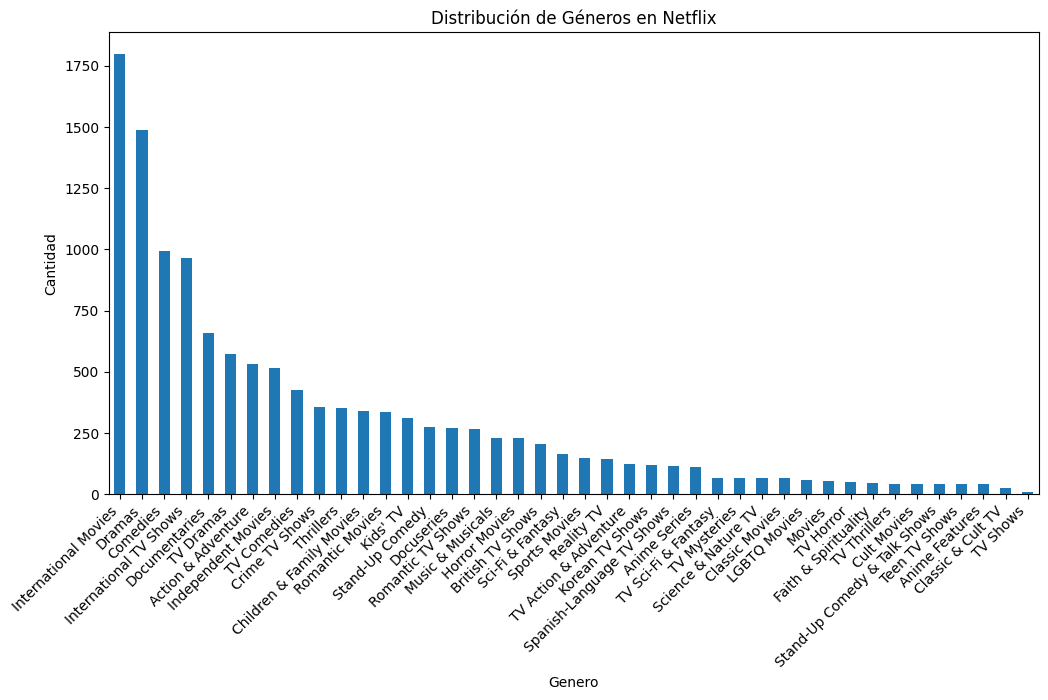

In [10]:
import matplotlib.pyplot as plt

genres = netflix_data['listed_in'].str.split(',').explode().str.strip()

genre_counts = genres.value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribución de Géneros en Netflix')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()


Aqui simplemente por año de lanzamiento contamos individualmente la cantidad de peliculas lanzadas y establecemos la tabla por tendencias de lanzamientos por año.

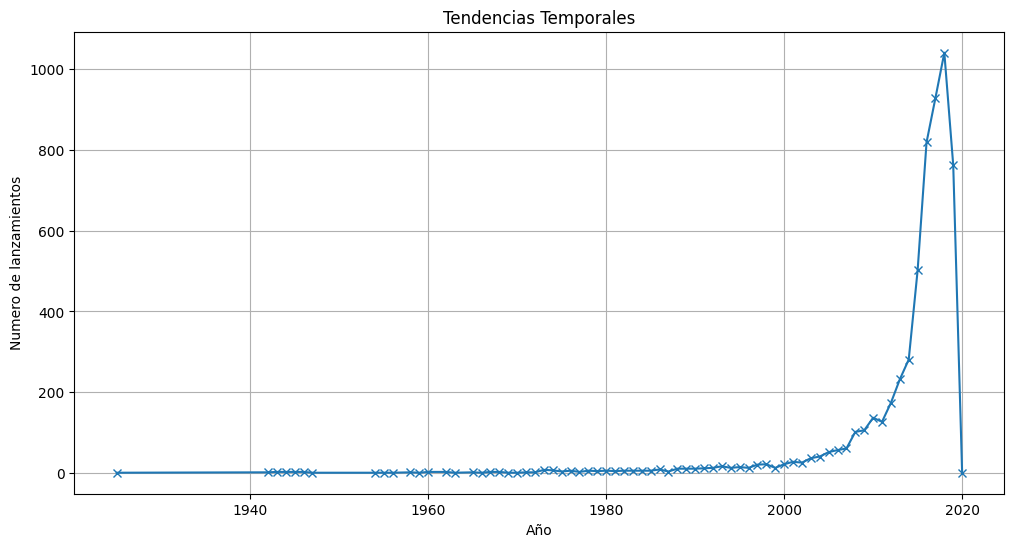

In [37]:
release_trends = netflix_data['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
release_trends.plot(kind='line', marker='x')
plt.title('Tendencias Temporales')
plt.xlabel('Año')
plt.ylabel('Numero de lanzamientos')
plt.grid(True)
plt.show()

Esta es un tanto mas compleja dado los cambios que se hicieron anteriormente para la duracion aqui creamos dos diagramas uno por cada tipo en en que organizamos por su duracion en minutos para las peliculas y por temporadas para las series. Y ambas se grafican.

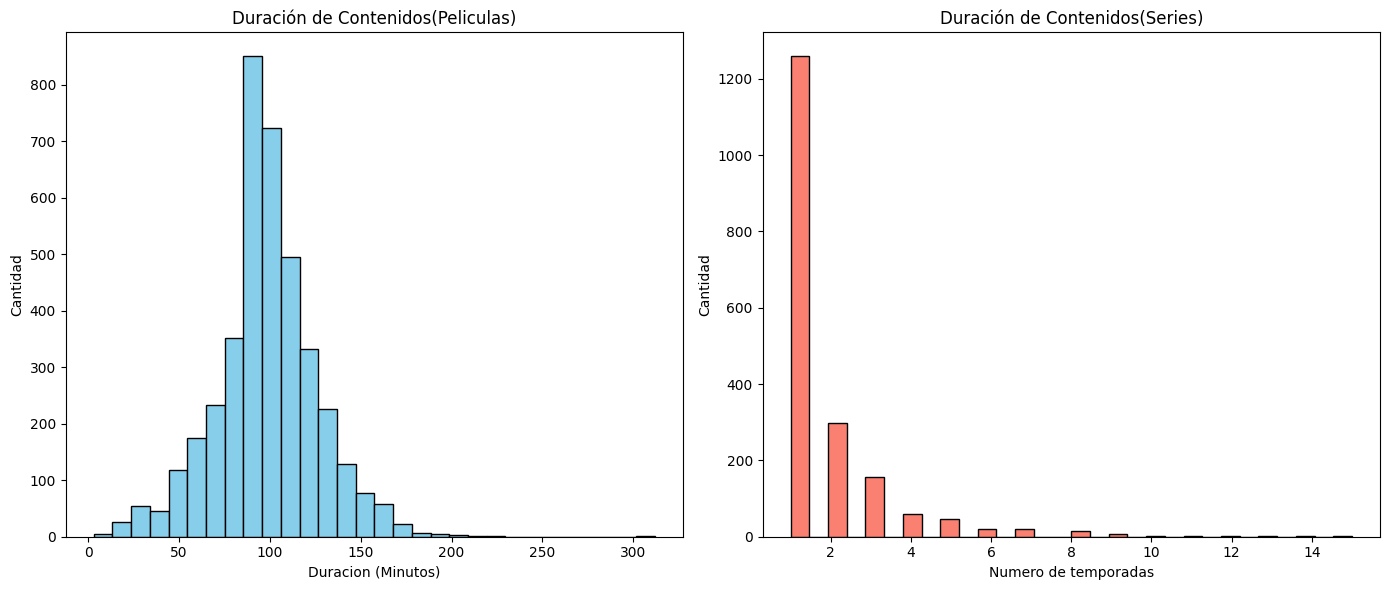

In [12]:
import numpy as np

movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

plt.figure(figsize=(14, 6))

#Para peliculas
plt.subplot(1, 2, 1)
plt.hist(movies['duration_numeric'], bins=30, color='skyblue', edgecolor='black')
plt.title('Duración de Contenidos(Peliculas)')
plt.xlabel('Duracion (Minutos)')
plt.ylabel('Cantidad')

# Para Series
plt.subplot(1, 2, 2)
plt.hist(tv_shows['duration_numeric'], bins=30, color='salmon', edgecolor='black')
plt.title('Duración de Contenidos(Series)')
plt.xlabel('Numero de temporadas')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()


Para esta estableci por rating la cantidad de peliculas que hay en la plataforma de cada uno.

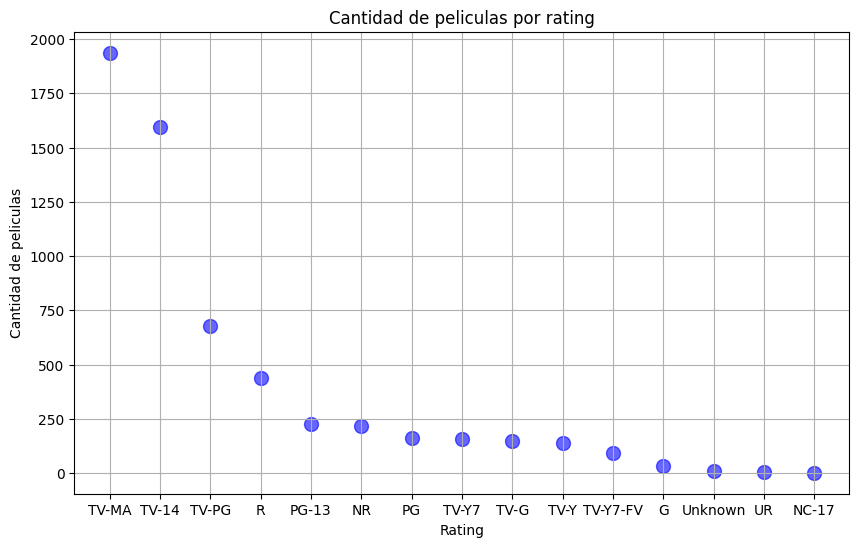

In [13]:
rating_count = netflix_data['rating'].value_counts()
plt.figure(figsize=(10, 6))
plt.scatter(rating_count.index, rating_count.values, color='blue', s=100, alpha=0.6)
plt.title('Cantidad de peliculas por rating')
plt.xlabel('Rating')
plt.ylabel('Cantidad de peliculas')
plt.grid(True)
plt.show()


Aqui para saber el indice de popularidad basandome en la cantidad de peliculas totales que hay y la cantidad de peliculas que tiene este rating estableci lo que podria ser un indice de popularidad dado la cantidad de peliculas.

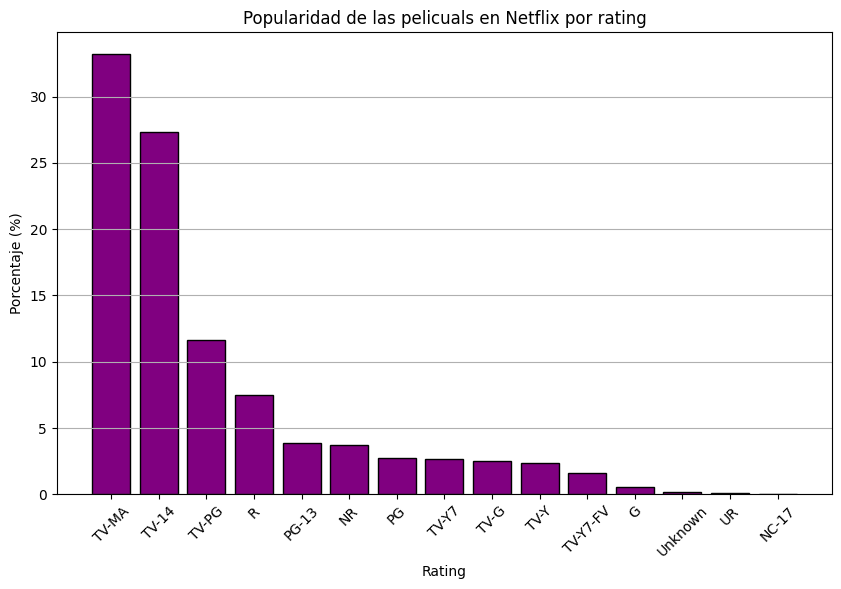

In [14]:
total_count = rating_count.sum()

rating_percentage = (rating_count / total_count) * 100

plt.figure(figsize=(10, 6))
plt.bar(rating_percentage.index, rating_percentage.values, color='purple', edgecolor='black')
plt.title('Popularidad de las pelicuals en Netflix por rating')
plt.xlabel('Rating')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Estableci los 10 productores que mas aparecen en netflix extrayendo directamente de la columna director a los mejores, dado el cambio hecho anteriormente para los valores NaN el generico fue el que mas tenia.

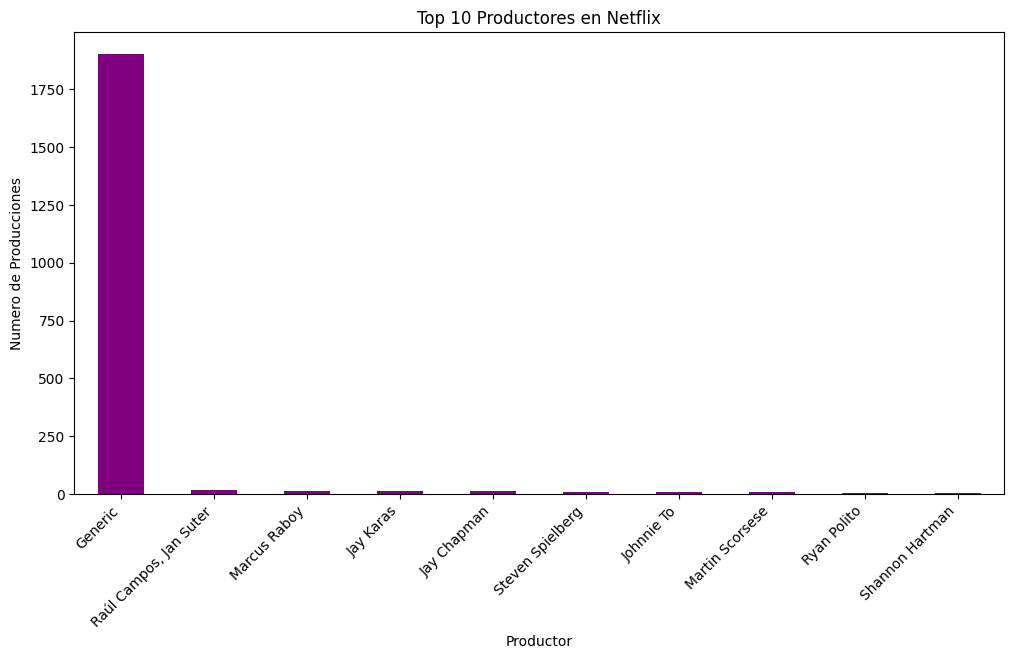

In [15]:
producer = netflix_data['director']

producer_counts = producer.value_counts().head(10)

plt.figure(figsize=(12, 6))
producer_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Productores en Netflix')
plt.xlabel('Productor')
plt.ylabel('Numero de Producciones')
plt.xticks(rotation=45, ha='right')
plt.show()


***2)***

In [18]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   show_id           5837 non-null   int64 
 1   title             5837 non-null   object
 2   director          5837 non-null   object
 3   cast              5837 non-null   object
 4   country           5837 non-null   object
 5   date_added        5837 non-null   object
 6   release_year      5837 non-null   int64 
 7   rating            5837 non-null   object
 8   listed_in         5837 non-null   object
 9   description       5837 non-null   object
 10  type              5837 non-null   object
 11  duration_numeric  5837 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 547.3+ KB


In [20]:
Dir = netflix_data["director"].value_counts()
print("Total Directores:{}".format(Dir))
Rat = netflix_data["rating"].value_counts()
print("Total Rating:{}".format(Rat))
Con = netflix_data["country"].value_counts()
print("Total Country:{}".format(Con))
typ = netflix_data["type"].value_counts()
print("Total Type:{}".format(typ))
cas = netflix_data["cast"].value_counts()
print("Total Cast:{}".format(cas))
ln = netflix_data["listed_in"].value_counts()
print("Total Listed_in:{}".format(ln))

Total Directores:director
Generic                   1901
Raúl Campos, Jan Suter      18
Marcus Raboy                14
Jay Karas                   13
Jay Chapman                 12
                          ... 
Lenin Bharathi               1
James Foley                  1
Kunihiko Yuyama              1
Ranjit Jeyakodi              1
Sorin Dan Mihalcescu         1
Name: count, Length: 3109, dtype: int64
Total Rating:rating
TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
Unknown       10
UR             7
NC-17          2
Name: count, dtype: int64
Total Country:country
United States                                           1907
India                                                    697
Unknown                                                  427
United Kingdom                                           336
Japan                     

In [22]:
pip install scikit-learn


Normalice los datos necesarios para hacer la regresion lineal, dado que los datos no podrian ser agrupados dada su complejidad o unicidad simplemente uses categorizacion por columnas y un numero exacto para cada tipo de valor unico en cada columna.


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_columns_to_normalize = ['director', 'rating', 'country', 'type', 'cast', 'listed_in']

for column in categorical_columns_to_normalize:
    le = LabelEncoder()
    netflix_data[column] = le.fit_transform(netflix_data[column])

netflix_data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,listed_in,description,type,duration_numeric
0,81193313,Chocolate,965,1700,314,"November 30, 2019",2019,6,330,Brought together by meaningful meals in the pa...,1,1
1,81197050,Guatemala: Heart of the Mayan World,1731,938,520,"November 30, 2019",2019,7,244,"From Sierra de las Minas to Esquipulas, explor...",0,67
2,81213894,The Zoya Factor,24,4430,186,"November 30, 2019",2019,6,171,A goofy copywriter unwittingly convinces the I...,0,135
3,81082007,Atlantics,1878,3040,148,"November 29, 2019",2019,6,274,"Arranged to marry a rich man, young Ada is cru...",0,106
4,80213643,Chip and Potato,965,46,65,2019,2019,10,369,"Lovable pug Chip starts kindergarten, makes ne...",1,2


Con los datos ya normalizados podia hacer la grafica de la distribucion de los datos para las peliculas.

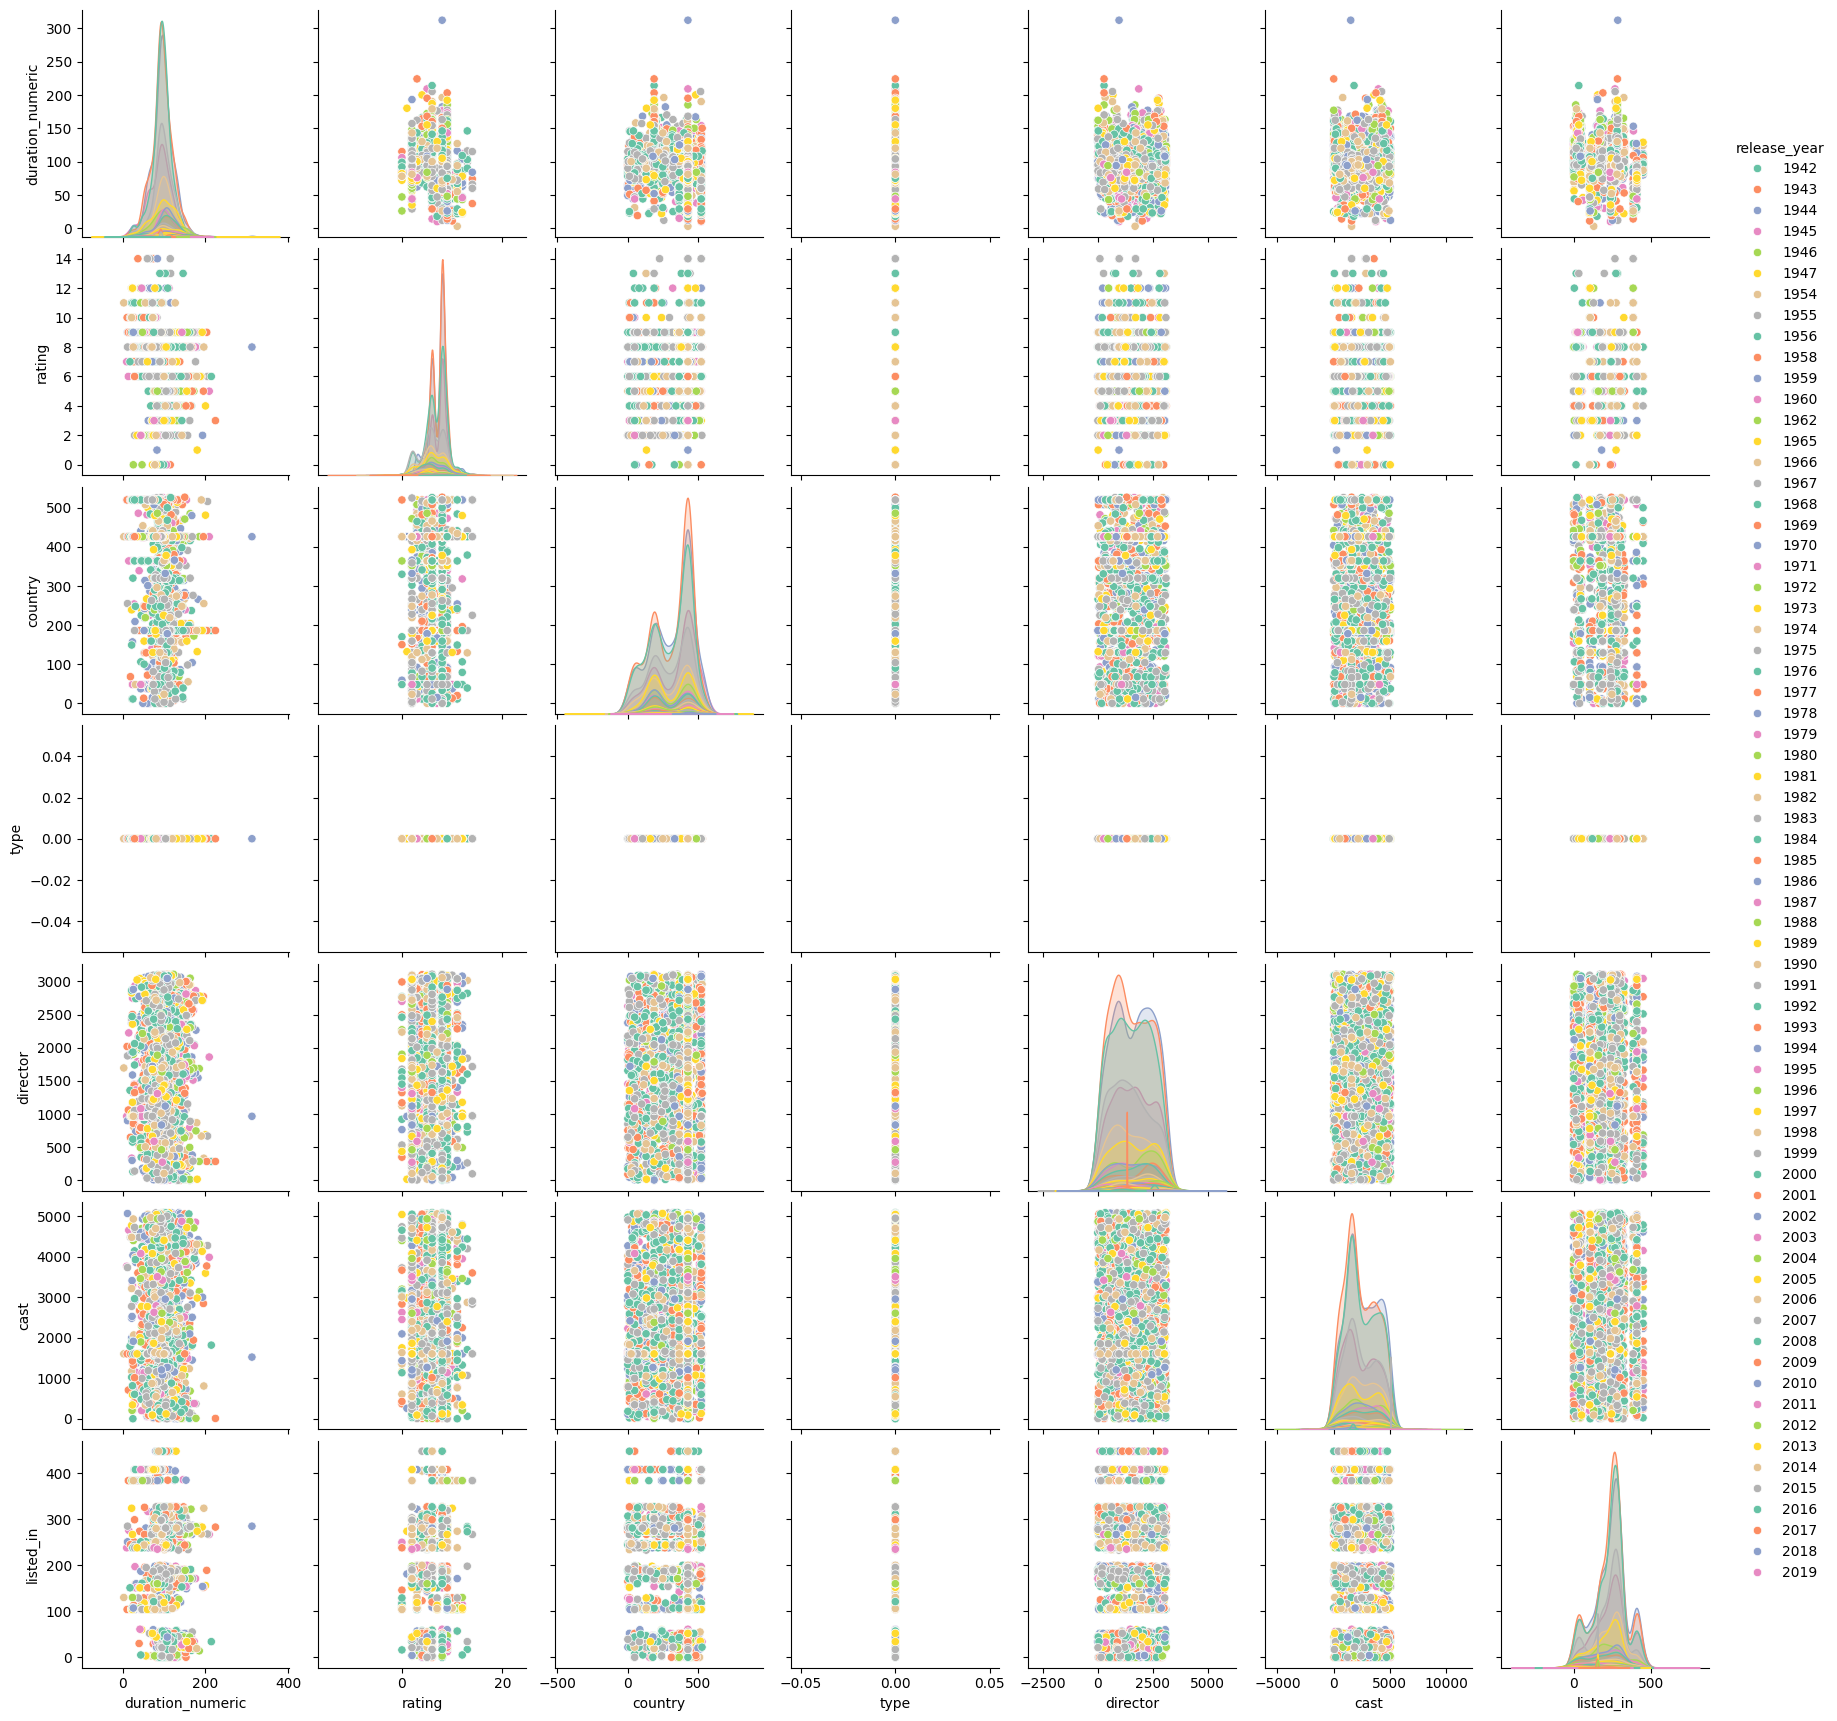

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix_data_filtered = netflix_data[netflix_data['type'] == 0]
plot_features = ["duration_numeric", "release_year", "rating", "country", "type", "director", "cast", "listed_in"]
sns.pairplot(netflix_data_filtered[plot_features], hue='release_year', palette="Set2")
plt.show()



Aqui solo queria ver la dependecia que hay entre los datos. Pos no mas.

<Axes: >

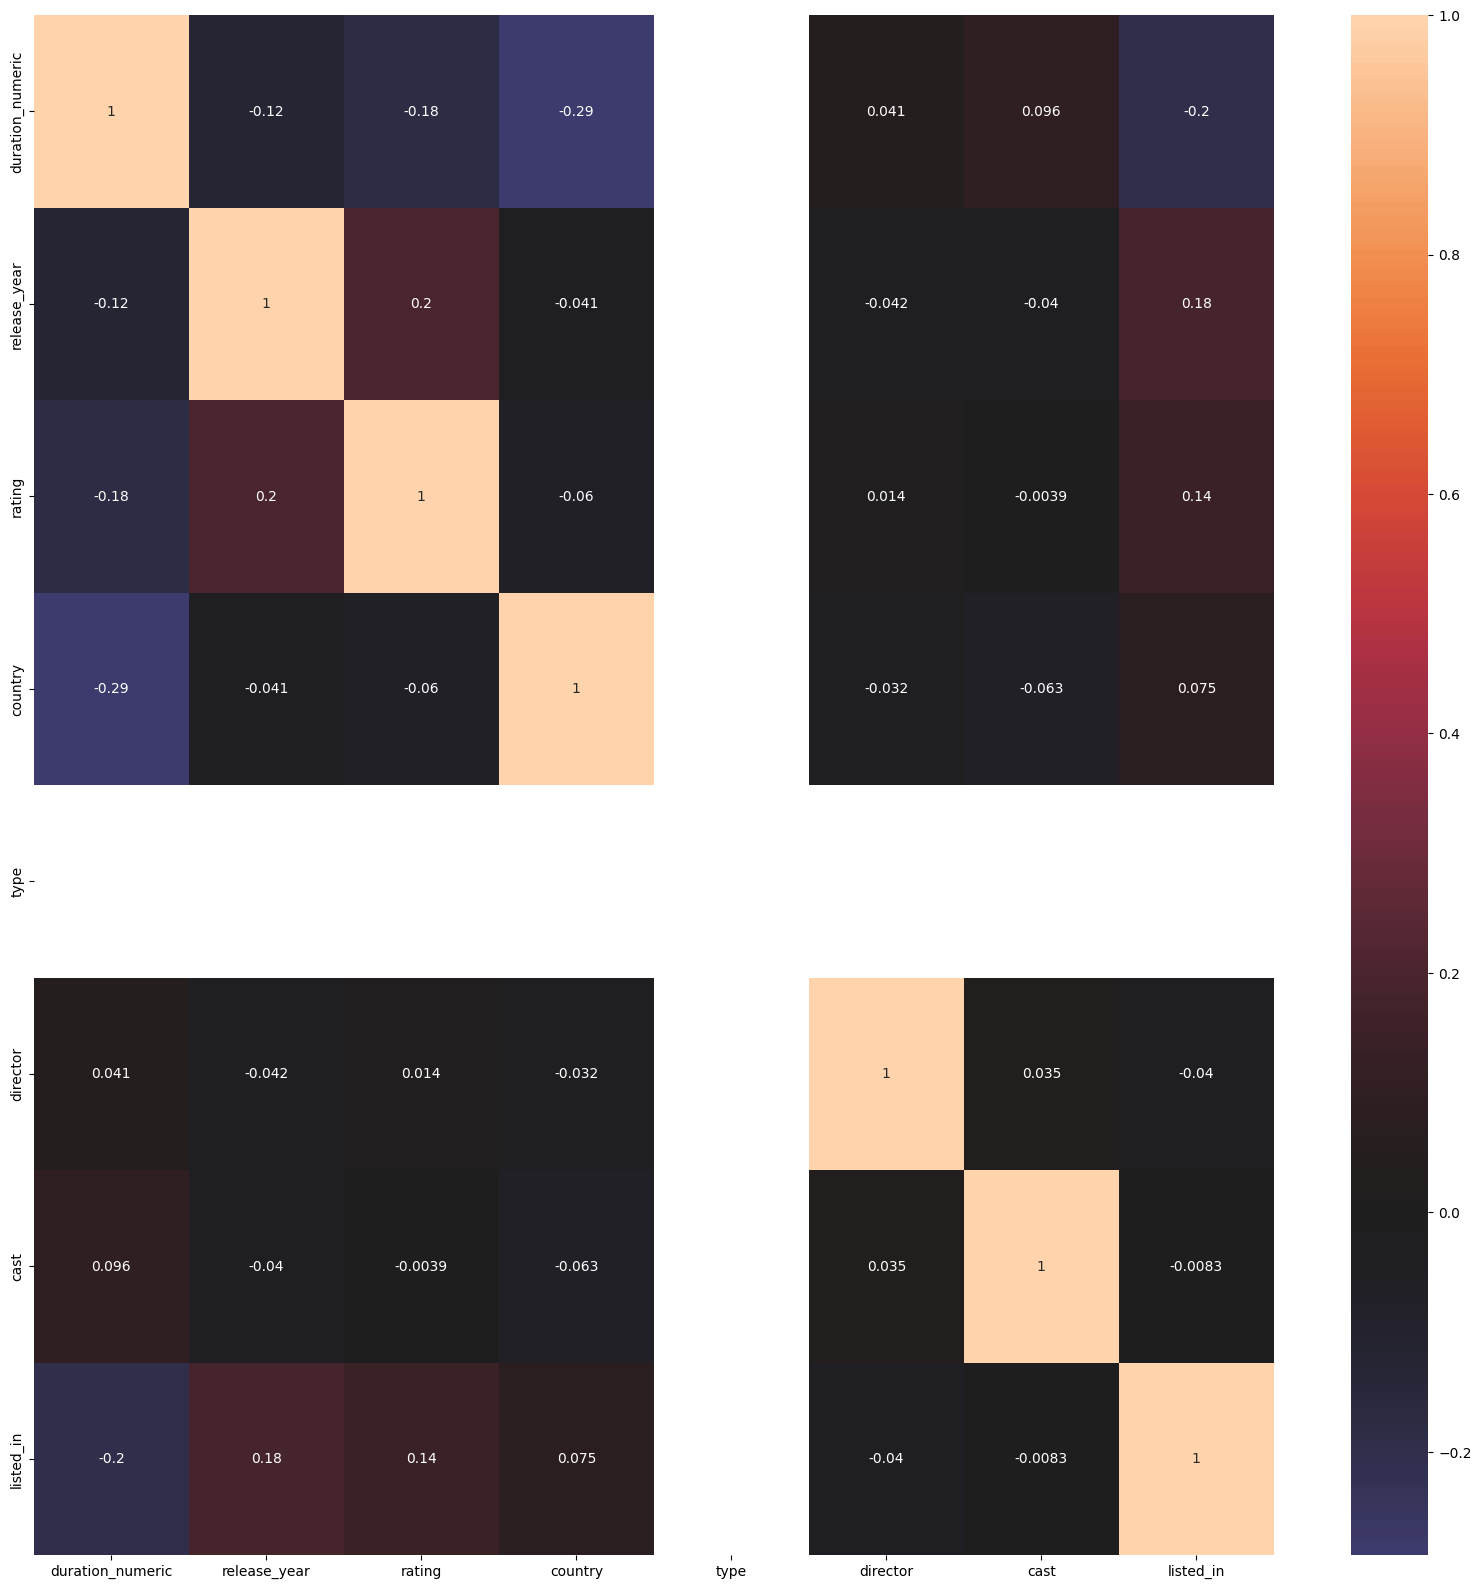

In [40]:

corrmat= netflix_data_filtered[plot_features].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, center=0)

Y ya basandonos en todo lo anterior hacemos el modelo predictivo para obtener el MSE, los coeficientes y el intercepto. Del modelo.

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = netflix_data_filtered[['release_year']]
y = netflix_data_filtered['duration_numeric']

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(" Error cuadrático medio (MSE): ",mse)
print("Coeficientes: " , model.coef_)
print("Interecepto: ",model.intercept_)


 Error cuadrático medio (MSE):  743.4063042168973
Coeficientes:  [-9.27958734e+02  4.90144987e-01 -8.60912536e-05]
Interecepto:  584178.3285087819


El MSE de 743.41 indica que quizas exista un cierto error en las predicciones, lo que sugiere que probablemente haya otros factores que no son el año de lanzamiento que influyen de mejor manera en la duración de las películas.